## Linear Regression on Insurance Dataset

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [3]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [4]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [6]:
#summary of insurance data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


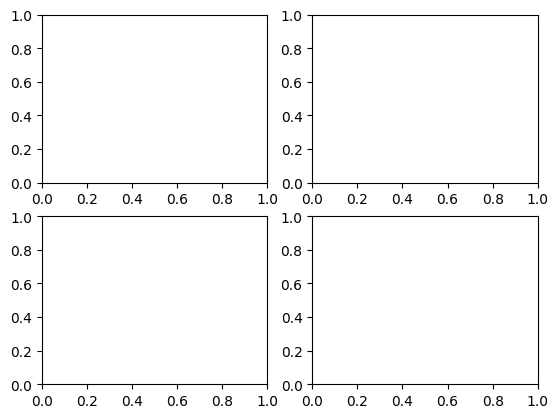

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2)

Baisc Visual Analysis or small exploration of variables (factors), a part of predictive modelling

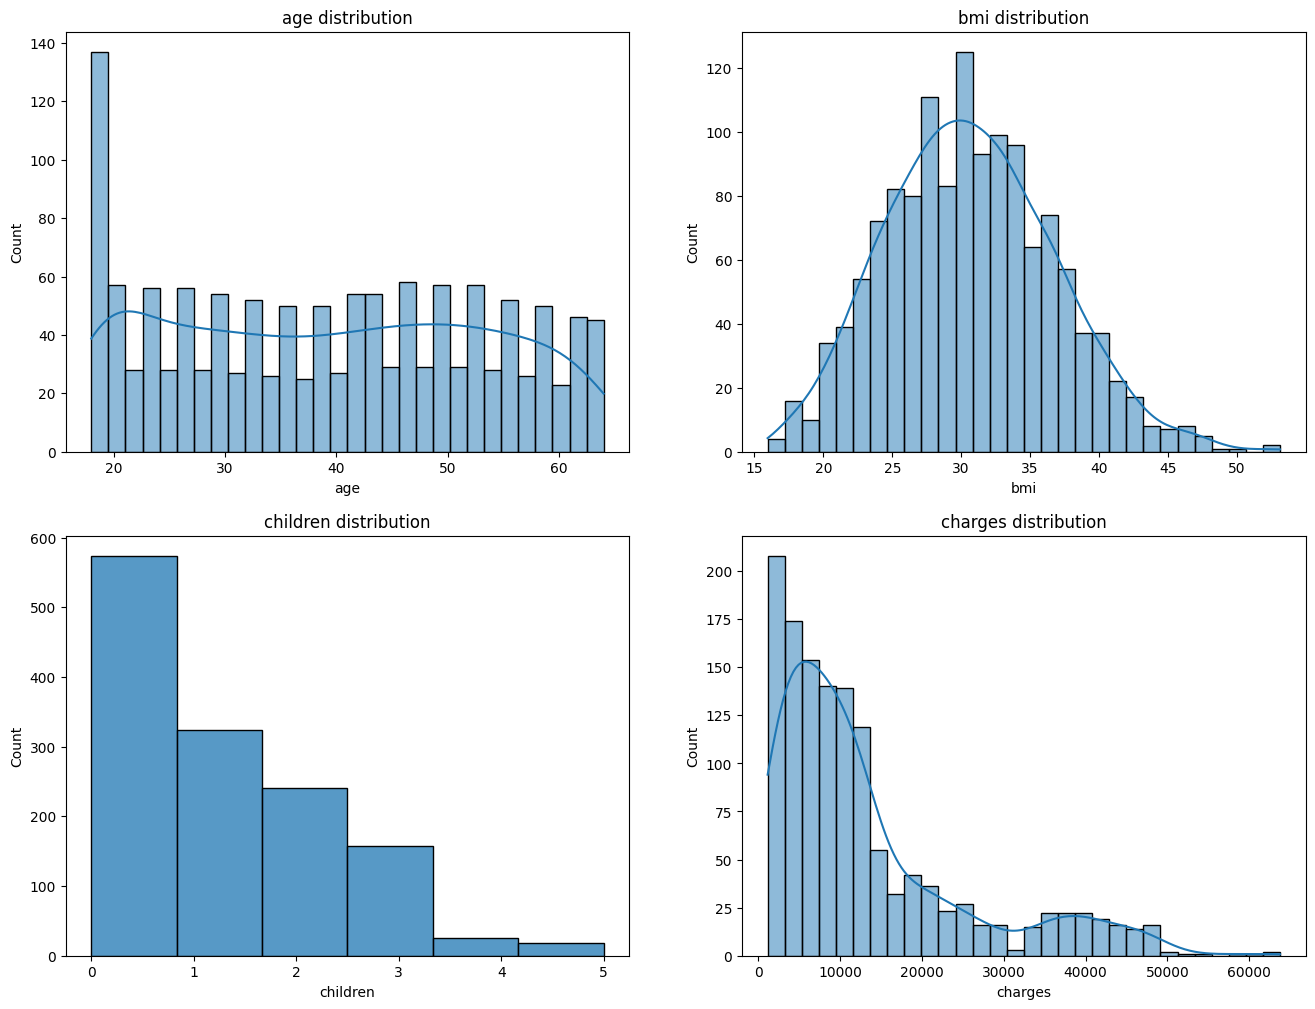

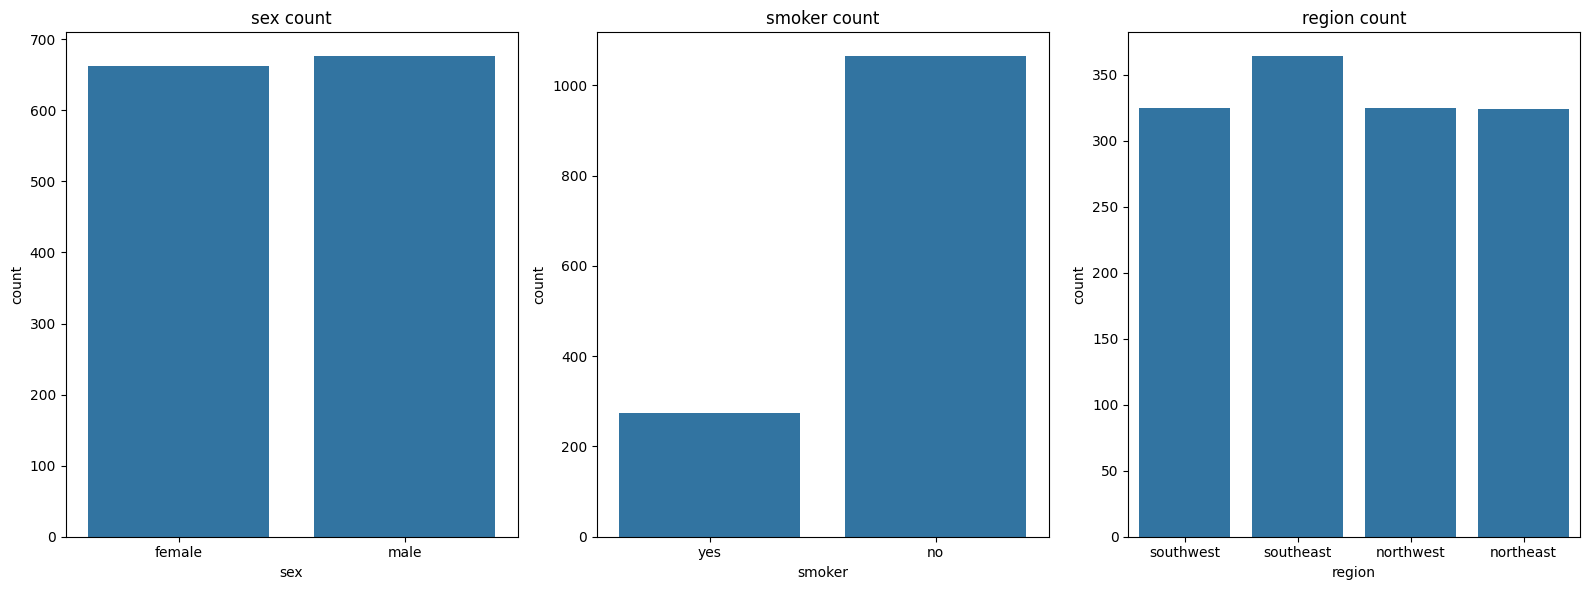

In [8]:
#distribution of continuous variables
fig, ax = plt.subplots(2,2,figsize=(16,12))

sns.histplot(data["age"],bins=30,kde=True,ax=ax[0,0])
ax[0,0].set_title("age distribution")

sns.histplot(data["bmi"],bins=30,kde=True,ax=ax[0,1])
ax[0,1].set_title("bmi distribution")

sns.histplot(data["children"],bins=6,kde=False,ax=ax[1,0])
ax[1,0].set_title("children distribution")

sns.histplot(data["charges"],bins=30,kde=True,ax=ax[1,1])
ax[1,1].set_title("charges distribution")

#distribution of categorical variables

fig,ax = plt.subplots(1,3,figsize=(16,6))

sns.countplot(x = "sex",data=data,ax=ax[0])
ax[0].set_title("sex count")

sns.countplot(x = "smoker",data=data,ax=ax[1])
ax[1].set_title("smoker count")

sns.countplot(x = "region",data=data,ax=ax[2])
ax[2].set_title("region count")

plt.tight_layout()

plt.show()

Age: Uniformly distributed, suggesting a good representation across different ages.

BMI: Normally distributed but slightly skewed to the right, indicating some people with higher BMIs.

Children: Most people have 0 to 2 children, with fewer having 3 or more.

Charges: Heavily right-skewed, meaning most medical charges are low, but there are some very high charges, likely influenced by outliers or specific medical conditions.

Sex, Smoker, Region: Balanced distribution for sex; fewer smokers than non-smokers; fairly uniform distribution across regions.

### Label Encoding


In [9]:
#encoding of categorical varibles in existing data frame
# label encoder always start from 0

from sklearn.preprocessing import LabelEncoder

catcols = ["sex","smoker","region"]

lr = LabelEncoder()

for col in catcols:
  data[col] = lr.fit_transform(data[col])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.shape[1]

7

### Data Preprocessing

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame() # empty dataframe
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

# dependent variable should not be there
vif_data = calculate_vif(data.drop('charges', axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,age,7.551348
1,sex,2.001061
2,bmi,10.371829
3,children,1.801245
4,smoker,1.256837
5,region,2.924528


In [12]:
# compute vif values after removing bmi
vif_data = calculate_vif(data.drop(['charges','bmi'], axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,age,3.382154
1,sex,1.870078
2,children,1.749297
3,smoker,1.240937
4,region,2.466704


Now multicollinearitly is under control we check for significance :

In [13]:
#the summary result is based on complete data
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'charges ~ age+sex+children+smoker+region', data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     698.1
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1332   BIC:                         2.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2785.5084    618.699     -4.502      0.000   -3999.239   -1571.778
age          273.1393     12.430     21.975      0.000     248.756     297.523
sex           61.9774    349.801      0.177      0.859    -624.243     748.197
children     487.1949    144.839      3.364      0.001     203.058     771.332
smoker      2.384e+04    433.372     55.002      0.000     2.3e+04    2.47e+04
region       -65.3782    157.857     -0.414      0.679    -375.054     244.298
==============================================================================
Omnibus:                      265.399   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.409
Skew:                           1.068   Prob(JB):                    2.61e-141
Kurtosis:                       5.655   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now remove the insignificant columns (p>0.05) and re-run

In [14]:
reg_all = smf.ols(formula = 'charges ~ age+children+smoker', data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1165.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.724e+04
Df Residuals:                    1334   BIC:                         2.726e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2851.9858    543.784     -5.245      0.000   -3918.750   -1785.222
age          273.0888     12.419     21.990      0.000     248.726     297.451
children     486.6524    144.700      3.363      0.001     202.789     770.516
smoker      2.384e+04    431.840     55.212      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.851   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.127
Skew:                           1.070   Prob(JB):                    1.82e-141
Kurtosis:                       5.654   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Interaction term creation
data["age_bmi"] = data["age"] * data["bmi"]
data.head()

,age,sex,bmi,children,smoker,region,charges,age_bmi
0,19,0,27.900,0,1,3,16884.92400,530.100
1,18,1,33.770,1,0,2,1725.55230,607.860
2,28,1,33.000,3,0,2,4449.46200,924.000
3,33,1,22.705,0,0,1,21984.47061,749.265
4,32,1,28.880,0,0,1,3866.85520,924.160


In [16]:
reg_all = smf.ols(formula = 'charges ~ age+children+smoker+age_bmi', data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     982.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:                -13559.
No. Observations:                1338   AIC:                         2.713e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2306.8168    523.157     -4.409      0.000   -3333.118   -1280.516
age           30.9479     24.998      1.238      0.216     -18.092      79.987
children     467.9349    138.597      3.376      0.001     196.043     739.826
smoker      2.385e+04    413.597     57.670      0.000     2.3e+04    2.47e+04
age_bmi        7.4011      0.672     11.013      0.000       6.083       8.719
==============================================================================
Omnibus:                      294.642   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.667
Skew:                           1.191   Prob(JB):                    7.11e-153
Kurtosis:                       5.625   Cond. No.                     4.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now remove age varaible as it became insignificant.

In [17]:
reg_all = smf.ols(formula = 'charges ~ children+smoker+age_bmi', data=data).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1309.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:                -13560.
No. Observations:                1338   AIC:                         2.713e+04
Df Residuals:                    1334   BIC:                         2.715e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1980.7645    452.121     -4.381      0.000   -2867.710   -1093.819
children     469.5680    138.618      3.387      0.001     197.635     741.501
smoker      2.385e+04    413.658     57.649      0.000     2.3e+04    2.47e+04
age_bmi        8.1329      0.320     25.429      0.000       7.505       8.760
==============================================================================
Omnibus:                      291.252   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.293
Skew:                           1.185   Prob(JB):                    6.95e-149
Kurtosis:                       5.574   Cond. No.                     3.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reached ideal situation as the R-squared and Adj. R-squared values became equal.

### Final Setup

In [18]:
#split bw independent and dependent variables
x = data[["children","smoker","age_bmi"]].values

y = data["charges"].values

In [19]:
type(x)

numpy.ndarray

In [20]:
#split the data between train and test
from sklearn.model_selection import train_test_split

#import linear regression algorithm
from sklearn.linear_model import LinearRegression

#regression involves the logic of slope, scaling is advisable
from sklearn.preprocessing import StandardScaler

In [21]:
#applying the standard scaler and scale the contents to a comparable scale 
# So that no one variable dominates our model

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#instantiate the standard scaler

#fit the scaler to independent variables

xs = scaler.fit_transform(x)
#x is the array of independent variables

#data gets converted into array

In [22]:
#split the data between train and the test
#splitting is random
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state=1)
#random state: results are reproducible

In [23]:
x_train.shape

(936, 3)

In [24]:
x_test.shape

(402, 3)

In [25]:
model = LinearRegression()#creating an instance
#fit_intercept: True
#normalize= False, deprecated

model.fit(x_train, y_train)#fitting the model of train data
#algo will do all the mathematical work and compute the desired variables
#intercept and the coeffs of each independent variable

LinearRegression()

In [26]:
model.intercept_

np.float64(13320.060447129767)

In [27]:
model.coef_

array([ 410.4046384 , 9710.41629121, 4144.85539764])

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred


array([ 3762.81704567, 12670.45725889, 13378.33343335, 13669.08769424,
        2462.86582895, 31949.80331937, 13670.63120025, 11111.73328183,
        3982.90766526, 30219.65323277, 10084.11478692, 19096.01572003,
        9094.82503465,  8411.02507564,  3323.82591439, 10589.12450447,
        4351.48407956,  7120.55868604, 15842.69348059, 14738.23005184,
       12124.75311992, 32786.13180569,  8530.94464669,  8959.06612588,
        2707.58804766,  7987.38633617,  8762.74889664, 11099.99088396,
        7701.92275728,  4466.80553434, 14653.53767441,  6371.38213347,
       32999.0024374 , 27281.51486778, 33335.96165202,  8633.4526065 ,
       30871.83235786, 28113.97020532, 16376.61191718, 33697.94553416,
        6418.98644917, 14232.19617595, 10468.72889026, 16114.19676113,
        4892.47472573, 12019.23022012,  4350.37694645, 29507.49266991,
        5710.468282  , 12786.82467752, 13685.9366533 , 12048.19678067,
        2911.09649727,  8604.22652535, 26717.60571231,  9633.7779604 ,
      

In [30]:
#error metric computations (RMSE)
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n: MSE

mse = mean_squared_error(y_test, y_pred)#actual y test value, predicted y test value
rmse = sqrt(mse)
rmse #margin of error on the test data

6133.945393366019

In [31]:
model.score(x_test,y_test)

0.7345034616326831

In [32]:
#use the above model for generating MEDV predictions on train data
y_pred_train = model.predict(x_train)

In [33]:
mse_train = mean_squared_error(y_train, y_pred_train)#actual y test value, predicted y test value
rmse_train = sqrt(mse_train)
rmse_train #margin of error on the train data

6083.771553977664

In [34]:
#r squared: coeff of determination
model.score(x_train,y_train)

0.7509525854833959

<Axes: ylabel='Density'>

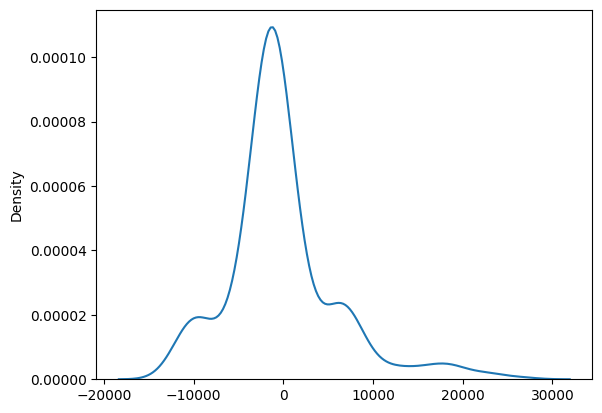

In [35]:
# checking of homogenity of variance
residuals = y_test - y_pred #av- pv
sns.kdeplot(residuals)

### Cross validation

In [36]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.7054099  0.78174307 0.72119861 0.71229242 0.8021797 ]
Average R² score: 0.744564740109657


In [37]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.64163128 0.78655613 0.82574039 0.71519553 0.71079047]
Average R² score: 0.7359827614091827


### Linear Regression with Categorical Encoding (One Hot Encoding)

In [38]:
# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#one hot encoding or categorical encoding using pandas get dummies
data_en = pd.get_dummies(data, columns=["sex","smoker","region"],dtype=int,drop_first=True) 
# drop first is important or the columns will have inifnite correlation with each other
# drop first remove one option created seperately from the categorical columns we broke to make binary

In [40]:
data_en.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_en.drop('charges', axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,age,7.686965
1,bmi,11.358443
2,children,1.809930
3,sex_male,2.003185
4,smoker_yes,1.261233
5,region_northwest,1.890281
6,region_southeast,2.265564
7,region_southwest,1.960745


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_en.drop(['charges','bmi'], axis=1))  # Removed charges and bmi
vif_data

,feature,VIF
0,age,3.850843
1,children,1.762729
2,sex_male,1.884719
3,smoker_yes,1.249792
4,region_northwest,1.706783
5,region_southeast,1.795873
6,region_southwest,1.715200


In [43]:
#the summary result is based on complete data
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'charges ~ age+children+sex_male+smoker_yes+region_northwest+\
region_southeast+region_southwest', data=data_en).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     499.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:03   Log-Likelihood:                -13615.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1330   BIC:                         2.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2790.0271    648.664     -4.301      0.000   -4062.544   -1517.510
age                273.3321     12.422     22.003      0.000     248.962     297.702
children           496.4631    144.847      3.428      0.001     212.310     780.617
sex_male            53.8127    349.606      0.154      0.878    -632.026     739.651
smoker_yes        2.378e+04    434.256     54.750      0.000    2.29e+04    2.46e+04
region_northwest  -345.6375    500.658     -0.690      0.490   -1327.803     636.528
region_southeast   389.1692    487.109      0.799      0.424    -566.416    1344.754
region_southwest  -484.1974    500.627     -0.967      0.334   -1466.302     497.907
==============================================================================
Omnibus:                      265.361   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.445
Skew:                           1.067   Prob(JB):                    9.44e-142
Kurtosis:                       5.664   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
data_en["age_bmi"] = data_en["age"] * data["bmi"]
data_en

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi
0,19,27.900,0,16884.92400,0,1,0,0,1,530.100
1,18,33.770,1,1725.55230,1,0,0,1,0,607.860
2,28,33.000,3,4449.46200,1,0,0,1,0,924.000
3,33,22.705,0,21984.47061,1,0,1,0,0,749.265
4,32,28.880,0,3866.85520,1,0,1,0,0,924.160
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,1548.500
1334,18,31.920,0,2205.98080,0,0,0,0,0,574.560
1335,18,36.850,0,1629.83350,0,0,0,1,0,663.300
1336,21,25.800,0,2007.94500,0,0,0,0,1,541.800


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_en.drop(['charges'], axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,age,32.021517
1,bmi,14.319707
2,children,1.827523
3,sex_male,2.029958
4,smoker_yes,1.272936
5,region_northwest,1.996555
6,region_southeast,2.272174
7,region_southwest,2.006494
8,age_bmi,37.387324


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_en.drop(['charges',"age_bmi"], axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,age,7.686965
1,bmi,11.358443
2,children,1.809930
3,sex_male,2.003185
4,smoker_yes,1.261233
5,region_northwest,1.890281
6,region_southeast,2.265564
7,region_southwest,1.960745


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity using VIF
def calculate_vif(df):
    VIF_data = pd.DataFrame()
    VIF_data["feature"] = df.columns
    VIF_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_data

vif_data = calculate_vif(data_en.drop(['charges',"age","bmi"], axis=1))  # Exclude target variable for VIF calculation
vif_data

,feature,VIF
0,children,1.739642
1,sex_male,1.868394
2,smoker_yes,1.243889
3,region_northwest,1.624018
4,region_southeast,1.853107
5,region_southwest,1.683050
6,age_bmi,3.594281


In [48]:
#the summary result is based on complete data
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'charges ~ children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest+age_bmi', data=data_en).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     562.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:03   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.713e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1459.6492    551.218     -2.648      0.008   -2541.000    -378.299
children           472.0076    138.674      3.404      0.001     199.965     744.051
sex_male          -147.6870    334.607     -0.441      0.659    -804.101     508.727
smoker_yes        2.388e+04    415.782     57.430      0.000    2.31e+04    2.47e+04
region_northwest  -304.9454    479.270     -0.636      0.525   -1245.153     635.262
region_southeast  -865.8765    468.560     -1.848      0.065   -1785.073      53.320
region_southwest  -963.2476    479.650     -2.008      0.045   -1904.200     -22.295
age_bmi              8.2055      0.322     25.490      0.000       7.574       8.837
==============================================================================
Omnibus:                      290.422   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.618
Skew:                           1.179   Prob(JB):                    3.58e-149
Kurtosis:                       5.588   Cond. No.                     6.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#the summary result is based on complete data
import statsmodels.formula.api as smf

reg_all = smf.ols(formula = 'charges ~ children+smoker_yes+age_bmi+region_southwest+region_southeast', data=data_en).fit()
reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     788.5
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:13:03   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.713e+04
Df Residuals:                    1332   BIC:                         2.716e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1681.3109    470.426     -3.574      0.000   -2604.168    -758.454
children           468.3611    138.520      3.381      0.001     196.621     740.102
smoker_yes        2.387e+04    414.260     57.624      0.000    2.31e+04    2.47e+04
age_bmi              8.2060      0.322     25.506      0.000       7.575       8.837
region_southwest  -810.8572    414.962     -1.954      0.051   -1624.908       3.193
region_southeast  -715.9598    402.853     -1.777      0.076   -1506.256      74.336
==============================================================================
Omnibus:                      290.378   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.773
Skew:                           1.180   Prob(JB):                    9.02e-149
Kurtosis:                       5.580   Cond. No.                     4.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
data_en

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi
0,19,27.900,0,16884.92400,0,1,0,0,1,530.100
1,18,33.770,1,1725.55230,1,0,0,1,0,607.860
2,28,33.000,3,4449.46200,1,0,0,1,0,924.000
3,33,22.705,0,21984.47061,1,0,1,0,0,749.265
4,32,28.880,0,3866.85520,1,0,1,0,0,924.160
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,1548.500
1334,18,31.920,0,2205.98080,0,0,0,0,0,574.560
1335,18,36.850,0,1629.83350,0,0,0,1,0,663.300
1336,21,25.800,0,2007.94500,0,0,0,0,1,541.800


In [51]:
#split bw independent and dependent variables
x = data_en[["children","smoker_yes","age_bmi","region_southwest","region_southeast"]].values

y = data_en[["charges"]].values

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs = scaler.fit_transform(x)

xs

array([[-0.90861367,  1.97058663, -1.30447634,  1.76548098, -0.61132367],
       [-0.07876719, -0.5074631 , -1.1556287 , -0.56641788,  1.63579466],
       [ 1.58092576, -0.5074631 , -0.55047577, -0.56641788,  1.63579466],
       ...,
       [-0.90861367, -0.5074631 , -1.04950585, -0.56641788,  1.63579466],
       [-0.90861367, -0.5074631 , -1.28208028,  1.76548098, -0.61132367],
       [-0.90861367,  1.97058663,  1.0751908 , -0.56641788, -0.61132367]],
      shape=(1338, 5))

In [53]:
#train-test split

from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test) = train_test_split(xs,y,test_size=0.3,random_state=1)

In [54]:
#fitting linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [55]:
model.score(x_test,y_test)

0.7356905657403906

In [56]:
model.score(x_train,y_train)

0.751848239810145

In [57]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.7019213  0.78235909 0.723899   0.70834897 0.80200279]
Average R² score: 0.7437062319139414


In [58]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')

# Calculate the average R² score across all folds
average_r2 = np.mean(cv_scores)

print("Cross-validated R² scores:", cv_scores)
print("Average R² score:", average_r2)

Cross-validated R² scores: [0.64297199 0.78515422 0.82168242 0.71388736 0.70928922]
Average R² score: 0.7345970430443153


# Regularised Regression Methods

## Ridge

In [59]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
#one hot encoding or categorical encoding using pandas get dummies
data_en = pd.get_dummies(data, columns=["sex","smoker","region"],dtype=int,drop_first=True)

In [61]:
#split bw independent and dependent variables
x = data_en.drop("charges",axis=1).values

y = data_en[["charges"]].values

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs = scaler.fit_transform(x)

xs

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]], shape=(1338, 8))

In [63]:
#train-test split

from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test) = train_test_split(xs,y,test_size=0.3,random_state=1)

In [64]:
list(range(5,20,2))

[5, 7, 9, 11, 13, 15, 17, 19]

In [65]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
rcv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# Setting up the RidgeCV with multiple alphas to find the optimal alpha
ridge_alphas = np.arange(0.01,1,0.01)  # Alpha values over several orders of magnitude
ridge_cv_model = RidgeCV(alphas=ridge_alphas, cv=rcv, scoring='neg_mean_absolute_error')

# Fitting RidgeCV model
ridge_cv_model.fit(x_train, y_train)

# Best alpha found
best_ridge_alpha = ridge_cv_model.alpha_

# Predicting on the test set with the best alpha
y_test_pred_ridge = ridge_cv_model.predict(x_test)

# Calculating R2 and RMSE for the Ridge regression on the test set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)


best_ridge_alpha, r2_test_ridge, rmse_test_ridge

(np.float64(0.01), 0.7405990582579954, 36761438.415603675)

In [66]:
rmse_test_ridge ** 0.5

6063.121177710675

In [67]:
# Predicting on the train set with the best alpha
y_train_pred_ridge = ridge_cv_model.predict(x_train)

# Calculating R2 and RMSE for the Ridge regression on the test set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = mse_train_ridge ** 0.5
r2_train_ridge, rmse_train_ridge

(0.7545557491772089, 6039.601872383951)

#### 74 on test and 75 on train after ridge

In [68]:
coeff = ridge_cv_model.coef_

In [69]:
xpd = data_en.drop("charges",axis=1)
xpd.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [70]:
# Extracting coefficients from the ridge model to see which features were retained or eliminated
ridge_coefficients = pd.DataFrame(coeff, index=xpd.columns)

# Displaying the coefficients
ridge_coefficients

,0
age,3534.762193
bmi,1965.233808
children,415.691996
sex_male,-141.380820
smoker_yes,9708.897985
region_northwest,-130.397820
region_southeast,-418.000986
region_southwest,-372.298278


This means insurance charge is maximum affected by smoking.

# Lasso

In [71]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
#one hot encoding or categorical encoding using pandas get dummies
data_en = pd.get_dummies(data, columns=["sex","smoker","region"],dtype=int,drop_first=True)

In [73]:
#split bw independent and dependent variables
x = data_en.drop("charges",axis=1).values

y = data_en[["charges"]].values

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs = scaler.fit_transform(x)

xs

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]], shape=(1338, 8))

In [75]:
#train-test split

from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test) = train_test_split(xs,y,test_size=0.3,random_state=1)

In [76]:
np.logspace(-6, 2, 100)

array([1.00000000e-06, 1.20450354e-06, 1.45082878e-06, 1.74752840e-06,
       2.10490414e-06, 2.53536449e-06, 3.05385551e-06, 3.67837977e-06,
       4.43062146e-06, 5.33669923e-06, 6.42807312e-06, 7.74263683e-06,
       9.32603347e-06, 1.12332403e-05, 1.35304777e-05, 1.62975083e-05,
       1.96304065e-05, 2.36448941e-05, 2.84803587e-05, 3.43046929e-05,
       4.13201240e-05, 4.97702356e-05, 5.99484250e-05, 7.22080902e-05,
       8.69749003e-05, 1.04761575e-04, 1.26185688e-04, 1.51991108e-04,
       1.83073828e-04, 2.20513074e-04, 2.65608778e-04, 3.19926714e-04,
       3.85352859e-04, 4.64158883e-04, 5.59081018e-04, 6.73415066e-04,
       8.11130831e-04, 9.77009957e-04, 1.17681195e-03, 1.41747416e-03,
       1.70735265e-03, 2.05651231e-03, 2.47707636e-03, 2.98364724e-03,
       3.59381366e-03, 4.32876128e-03, 5.21400829e-03, 6.28029144e-03,
       7.56463328e-03, 9.11162756e-03, 1.09749877e-02, 1.32194115e-02,
       1.59228279e-02, 1.91791026e-02, 2.31012970e-02, 2.78255940e-02,
      

In [78]:
from sklearn.linear_model import LassoCV

# Setting up the LassoCV with multiple alphas to find the optimal alpha
lasso_alphas = np.logspace(-6, 2, 100)  # Alpha values over several orders of magnitude
lasso_cv_model = LassoCV(alphas=lasso_alphas, cv=10, max_iter=10000)

# Fitting LassoCV model
lasso_cv_model.fit(x_train, y_train)

# Best alpha found
best_lasso_alpha = lasso_cv_model.alpha_

# Predicting on the test set with the best alpha
y_test_pred_lasso = lasso_cv_model.predict(x_test)

# Calculating R2 and RMSE for the Lasso regression on the test set
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_test_lasso = mse_test_lasso ** 0.5
best_lasso_alpha, r2_test_lasso, rmse_test_lasso

C:\Users\Aman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(np.float64(57.223676593502205), 0.7395370184090906, 6075.520320885886)

In [80]:
# Predicting on the train set with the best alpha
y_train_pred_lasso = lasso_cv_model.predict(x_train)

# Calculating R2 and RMSE for the Ridge regression on the test set
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
rmse_train_lasso = mse_train_lasso ** 0.5
r2_train_lasso, rmse_train_lasso

(0.7542792488579049, 6043.002811278598)

#### 73 on test and 75 on ridge, not a major difference and ridge was a bit better, but still overfit.

In [81]:
lasso_cv_model.coef_

array([3485.98988455, 1878.80051578,  355.56412727,  -70.74318303,
       9648.4188255 ,   -0.        , -236.59958243, -210.76432211])

In [82]:
# Extracting coefficients from the Lasso model to see which features were retained or eliminated
lasso_coefficients = pd.Series(lasso_cv_model.coef_, index=xpd.columns)

# Displaying the coefficients
lasso_coefficients

age                 3485.989885
bmi                 1878.800516
children             355.564127
sex_male             -70.743183
smoker_yes          9648.418826
region_northwest      -0.000000
region_southeast    -236.599582
region_southwest    -210.764322
dtype: float64

#### Now to check if after removing multicollinearity, doing feature significance applying Ridge
#### to see if  will there be any difference in result.

In [83]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
#one hot encoding or categorical encoding using pandas get dummies
data_en = pd.get_dummies(data, columns=["sex","smoker","region"],dtype=int,drop_first=True)

In [85]:
data_en["age_bmi"] = data_en["age"] * data["bmi"]
data_en

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi
0,19,27.900,0,16884.92400,0,1,0,0,1,530.100
1,18,33.770,1,1725.55230,1,0,0,1,0,607.860
2,28,33.000,3,4449.46200,1,0,0,1,0,924.000
3,33,22.705,0,21984.47061,1,0,1,0,0,749.265
4,32,28.880,0,3866.85520,1,0,1,0,0,924.160
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,1548.500
1334,18,31.920,0,2205.98080,0,0,0,0,0,574.560
1335,18,36.850,0,1629.83350,0,0,0,1,0,663.300
1336,21,25.800,0,2007.94500,0,0,0,0,1,541.800


In [86]:
#split bw independent and dependent variables
x = data_en[["children","smoker_yes","age_bmi","region_southwest","region_southeast"]].values

y = data_en[["charges"]].values

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xs = scaler.fit_transform(x)

xs

array([[-0.90861367,  1.97058663, -1.30447634,  1.76548098, -0.61132367],
       [-0.07876719, -0.5074631 , -1.1556287 , -0.56641788,  1.63579466],
       [ 1.58092576, -0.5074631 , -0.55047577, -0.56641788,  1.63579466],
       ...,
       [-0.90861367, -0.5074631 , -1.04950585, -0.56641788,  1.63579466],
       [-0.90861367, -0.5074631 , -1.28208028,  1.76548098, -0.61132367],
       [-0.90861367,  1.97058663,  1.0751908 , -0.56641788, -0.61132367]],
      shape=(1338, 5))

In [88]:
#train-test split

from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test) = train_test_split(xs,y,test_size=0.3,random_state=1)

In [89]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
rcv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# Setting up the RidgeCV with multiple alphas to find the optimal alpha
ridge_alphas = np.arange(0.01,1,0.01)  # Alpha values over several orders of magnitude
ridge_cv_model = RidgeCV(alphas=ridge_alphas, cv=rcv, scoring='neg_mean_absolute_error')

# Fitting RidgeCV model
ridge_cv_model.fit(x_train, y_train)

# Best alpha found
best_ridge_alpha = ridge_cv_model.alpha_

# Predicting on the test set with the best alpha
y_test_pred_ridge = ridge_cv_model.predict(x_test)

# Calculating R2 and RMSE for the Ridge regression on the test set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = mse_test_ridge ** 0.5
best_ridge_alpha, r2_test_ridge, rmse_test_ridge

(np.float64(0.01), 0.7356907002692339, 6120.21523961894)

In [90]:
# Predicting on the train set with the best alpha
y_train_pred_ridge = ridge_cv_model.predict(x_train)

# Calculating R2 and RMSE for the Ridge regression on the test set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = mse_train_ridge ** 0.5
r2_train_ridge, rmse_train_ridge

(0.7518482397227335, 6072.822105515043)

**No such difference**